In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [7]:
data =fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)

# Salvando os dados em um dataframe

In [23]:
dataframe = pd.DataFrame(data.data,columns=data.feature_names)

In [24]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Adicionando o target ao dataFrame


In [25]:
dataframe['MedHouseVal'] = data.target

In [26]:
dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Verificando de modo geral as estatisticas

In [27]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Verificando outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a71bceb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a71cb460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a71bcc10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1a71cb9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a71cbc40>],
 'means': []}

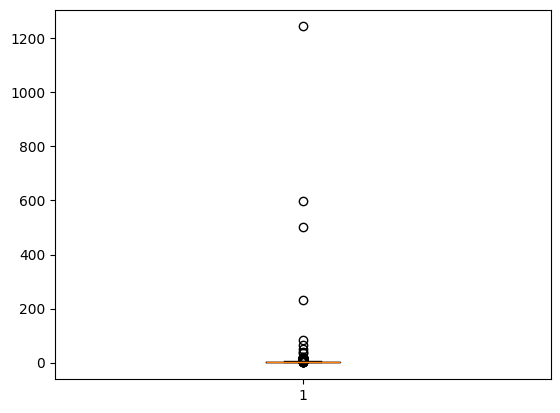

In [29]:
plt.boxplot(dataframe['AveOccup'])

# Pode-se observar que existem alguns outliers quando se trata do numero de pessoas por residencia
(temos uma media de 3.07, mas temos valores acima de 1000)

## Para esse tipo de limpeza, vamos considerar acima de 5 como outlier

In [31]:
dataframe = dataframe[dataframe['AveOccup'] <=5]

In [32]:
dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20295.000000,20295.000000,20295.000000,20295.000000,20295.000000,20295.000000,20295.000000,20295.000000,20295.000000
mean,3.882959,28.606307,5.442597,1.096917,1416.156837,2.874513,35.643865,-119.579652,2.076880
std,1.900870,12.600260,2.482918,0.476929,1097.800081,0.670726,2.140258,2.007564,1.156908
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.569000,18.000000,4.460519,1.006135,786.000000,2.423799,33.940000,-121.810000,1.198000
50%,3.548600,29.000000,5.242063,1.048860,1161.000000,2.806452,34.260000,-118.510000,1.813000
75%,4.770550,37.000000,6.063594,1.099322,1715.000000,3.251085,37.720000,-118.010000,2.661000
max,15.000100,52.000000,141.909091,34.066667,28566.000000,5.000000,41.950000,-114.310000,5.000010


Text(0.5, 1.0, 'Numero de Pessoas Por Residencia')

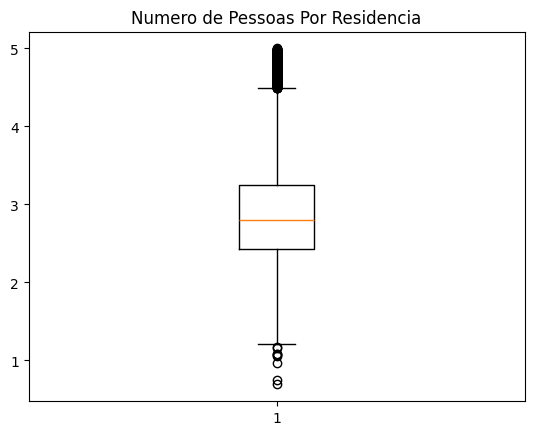

In [34]:
plt.boxplot(dataframe['AveOccup'])
plt.title('Numero de Pessoas Por Residencia')

# De forma semelhante, pode-se considerar um valor abaixo de 1 como outlier, tendo em vista que uma média de pessoas em uma casa, de forma logica é ao menos 1

In [35]:
dataframe = dataframe[dataframe['AveOccup'] >= 1]

Text(0.5, 1.0, 'Numero de Pessoas Por Residencia')

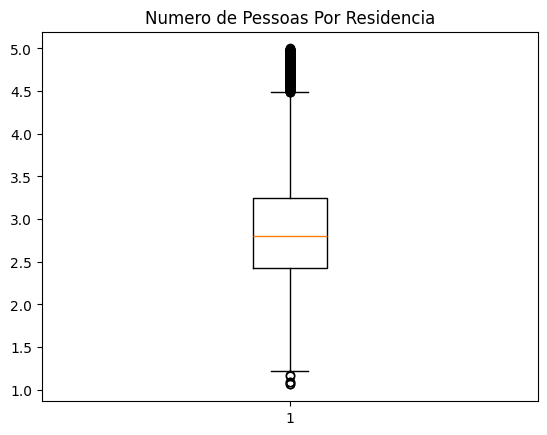

In [36]:
plt.boxplot(dataframe['AveOccup'])
plt.title('Numero de Pessoas Por Residencia')

In [37]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20292.000000,20292.000000,20292.000000,20292.000000,20292.000000,20292.000000,20292.000000,20292.000000,20292.000000
mean,3.883346,28.608516,5.441653,1.096686,1416.354967,2.874819,35.643643,-119.579568,2.076881
std,1.900711,12.599787,2.477664,0.475958,1097.759767,0.670301,2.140146,2.007647,1.156917
min,0.499900,1.000000,0.846154,0.333333,5.000000,1.060606,32.540000,-124.350000,0.149990
25%,2.569300,18.000000,4.460779,1.006135,786.000000,2.423899,33.940000,-121.810000,1.198000
50%,3.548700,29.000000,5.242150,1.048849,1161.000000,2.806543,34.260000,-118.510000,1.813000
75%,4.770800,37.000000,6.063573,1.099243,1715.000000,3.251152,37.720000,-118.010000,2.661000
max,15.000100,52.000000,141.909091,34.066667,28566.000000,5.000000,41.950000,-114.310000,5.000010


In [38]:
dataframe.shape

(20292, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a9752400>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a9752940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a9752160>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1a9752e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a975d160>],
 'means': []}

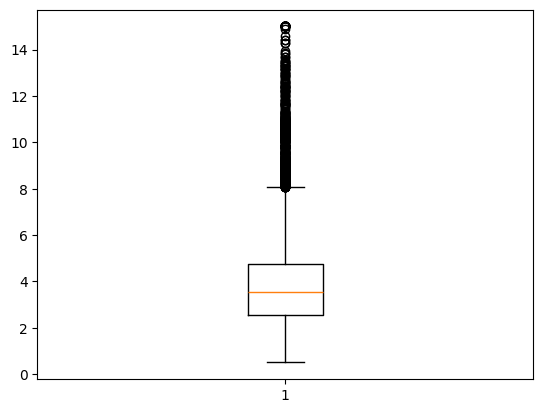

In [41]:
plt.boxplot(dataframe['MedInc'])

In [42]:
dataframe['MedInc'].describe()

count    20292.000000
mean         3.883346
std          1.900711
min          0.499900
25%          2.569300
50%          3.548700
75%          4.770800
max         15.000100
Name: MedInc, dtype: float64

In [43]:
dataframe['AveBedrms'].describe()

count    20292.000000
mean         1.096686
std          0.475958
min          0.333333
25%          1.006135
50%          1.048849
75%          1.099243
max         34.066667
Name: AveBedrms, dtype: float64

In [44]:
dataframe['AveRooms'].describe()

count    20292.000000
mean         5.441653
std          2.477664
min          0.846154
25%          4.460779
50%          5.242150
75%          6.063573
max        141.909091
Name: AveRooms, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a97d9cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a97e3250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a97d9a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1a97e3790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a97e3a30>],
 'means': []}

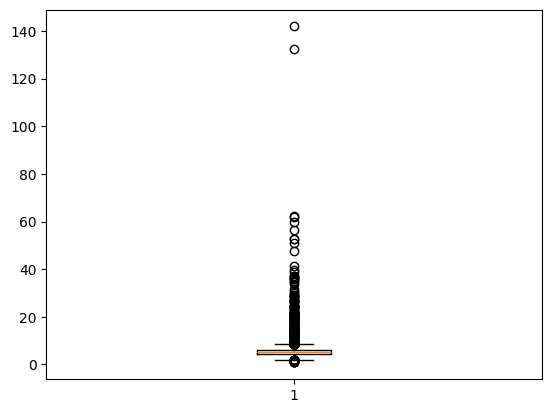

In [45]:
plt.boxplot(dataframe['AveRooms'])

In [46]:
dataframe = dataframe[dataframe['AveRooms'] < 40]

In [47]:
dataframe['AveBedrms'].describe()

count    20281.000000
mean         1.089368
std          0.309916
min          0.333333
25%          1.006116
50%          1.048813
75%          1.099157
max          9.703704
Name: AveBedrms, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c19028ca00>,
 'caps': [<matplotlib.lines.Line2D at 0x1c19028cf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a97bfe20>],
 'medians': [<matplotlib.lines.Line2D at 0x1c19029c4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c19029c760>],
 'means': []}

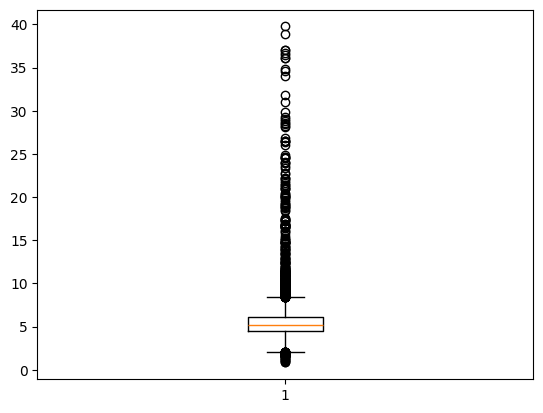

In [48]:
plt.boxplot(dataframe['AveRooms'])

# Verificando valores nan

In [49]:
nan_counts = dataframe.isna().sum()
nan_counts

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# Salvando o dataframe em um csv

In [50]:
dataframe.to_csv('califforniaHouse.csv',index=False)